# LFA + BBC / Introduction to Python

Throughout the laboratories, questions that you should try to answer are highlighted as follows :

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: This is a question</p>

## Introduction to IPython notebooks

In this laboratory you are going to learn how to perform interactive computing using **IPython**. **IPython** is an interactive shell for python that has more functionnalities than the basic one. This guide does not start from the basics of the general purpose language **python**. If you do not know this language, it is recommended to follow a **python** tutorial in order to learn the basic concepts and commands. You can have a look at the [official python tutorial](https://docs.python.org/2/tutorial/) or [Google's python tutorial](https://developers.google.com/edu/python/) for example.

Note that for this course, we will use the Python 2.7.X series. (Important: do not use Python 3.5.X as it will require performing many adaptations to the current version of the laboratories)

You will use a browser-based notebook to interactively explore a dataset by:
- Reading raw data from ascii files
- Reading typed data (data frames) from ascii files
- Selecting specific columns and/or rows from a dataset
- Filtering datasets
- Plotting the information in the dataset (e.g., scatter-plot, boxplot, histogram)

### Using the notebooks

You are in an IPython notebook right now. An IPython notebook is a web interface to a Python interpreter.

A notebook is made of cells. Each cell has a type which defines what happens when it is run. 

- Markdown cells allow you to write [Markdown](http://daringfireball.net/projects/markdown/) text in them. They are just displayed as HTML when run.
- Code cells contain python code. When the cell is run, the code is sent to the python interpreter, executed and you get the result in the cell output.
- Various header cells that allow you to structure your document.

You can change the type of a cell using the drop-down menu in the toolbar.

You can click (for Code cells) or double-click (for headers and markdown cells) on cells to edit their content. You can then use keyboard shortcuts to run them :

- Ctrl + Enter : run in place
- Shift + Enter : run and move to next cell
- Alt + Enter : run and insert new cell after

In [1]:
# This is a code cell containing python code !
print 2+2

4


The python interpreter that executes the code you write in the notebook is called a *Kernel*. You can restart the kernel (the interpreter) using the *Kernel* menu. This is useful if you want to delete all your variables.

IPython has also "magic" functions that start with % . They allow you to do a lot of useful things with your ipython environment :

http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb

The %who magic gives you a list of the defined python variables. object? can be used to get documentation about an object :

In [2]:
a = 2
%who

a	 


In [3]:
def my_documented_function(a):
    """This is a revolutionary function that returns a + 1"""
    return a + 1

print my_documented_function(2)
print 'This is the traditional python help() function :\n'
help(my_documented_function)
print 'End of help() command output \n'

# We can access the same info with just ? (note that you have to run this cell to view the effect).
my_documented_function?
# The output may be provided in a separate pane in your browser

3
This is the traditional python help() function :

Help on function my_documented_function in module __main__:

my_documented_function(a)
    This is a revolutionary function that returns a + 1

End of help() command output 



## Scientific computing with NumPy

Python has a number of packages (libraries) dedicated to scientific programming :

The foundation is [numpy](http://www.numpy.org/) which provides a N-dimensional array implementation with a nice indexing syntax (similar to MATLAB).

Then comes [scipy](http://www.scipy.org/) which contains a number of algorithms (signal processing, distance computation, etc...) built on top of numpy.

[matplotlib](http://matplotlib.org/) is a library to create 2D plots.

[pandas](http://pandas.pydata.org/) provides a DataFrame implementation, which is a layer on top of numpy arrays that makes some things (handling missing values, date indexing) easier. Heavily inspired by the [R](http://www.r-project.org/) statistical computing language.

[scikit-learn](http://scikit-learn.org/stable/) is a machine learning library that contains implementations of many of the most popular machine learning algorithms.

[theano](http://deeplearning.net/software/theano/) allows you to write programs that are compiled and run on a GPU.

Finally, this is not a python package, but [stack overflow](http://stackoverflow.com/) is a really good question-and-answers site where you can probably find answers to the most common problems you'll have :-)

If you want to install a scientific python environment on your machines, we strongly suggest to use [anaconda](https://store.continuum.io/cshop/anaconda/). It is a "python distribution" that comes with a package manager (conda) and all of the scientific packages listed above (and many others) pre-installed.

The virtual machine provided for the course also uses anaconda.

## Quick numpy introduction

Numpy allows you to define [multidimensionnal arrays](http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html) (recommended reading).

In [4]:
# Makes the numpy function available as np.<funcname> (np is a convention)
import numpy as np

array1 = np.array([
    [1, 2, 3],
    [4, 5, 6]]
)

print array1.shape

# The last line of a python cell is evaluated and used as the output for the cell
array1

(2, 3)


array([[1, 2, 3],
       [4, 5, 6]])

The array elements can be accessed using the [indexing syntax](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#arrays-indexing) (recommended reading). Numpy (and python) uses 0-based indexing.

In [5]:
print "element (2,3) : ", array1[1,2]
print "first row     : ", array1[0,:]
print "second column : ", array1[:,1]
print "second and third element of the second row : ", array1[1, 1:]

element (2,3) :  6
first row     :  [1 2 3]
second column :  [2 5]
second and third element of the second row :  [5 6]


You can do a [lot of things](http://docs.scipy.org/doc/numpy/reference/) with numpy arrays. For example, we can compute the mean of each column :

In [6]:
array1.mean(axis=1)

array([ 2.,  5.])

We can also sort an array :

In [7]:
array2 = np.array([5, 8, 2, 9, 4, 3])
print "original      : ", array2

print "using argsort : ", array2[np.argsort(array2)] # the fancy indexing version

array2.sort() # not that this does in-place sorting, so it *modifies* array2
print "after sort()  : ", array2

original      :  [5 8 2 9 4 3]
using argsort :  [2 3 4 5 8 9]
after sort()  :  [2 3 4 5 8 9]


We can also use comparison operators on arrays, giving us a boolean mask. And then use the mask to index the array :

In [8]:
mask = array1 == 5
print array1
print mask
print array1[mask]

[[1 2 3]
 [4 5 6]]
[[False False False]
 [False  True False]]
[5]


As exercices, do the following :

- Compute the max of each row. Each column ?
- Print the elements of array1 that are less than 4 (without a for loop)

## The Wine dataset

### Loading the dataset with numpy

We will use the wine dataset from the UCI repository :
https://archive.ics.uci.edu/ml/datasets/Wine

The wine.data file is a simple CSV file, which we can easily load as a numpy array with np.genfromtxt.

In [9]:
# Some nicer printing defaults for numpy arrays
np.set_printoptions(precision=5, suppress=True)

data = np.genfromtxt('data/wine/wine.data', delimiter=',')
print data.shape
print data

(178, 14)
[[    1.      14.23     1.71 ...,     1.04     3.92  1065.  ]
 [    1.      13.2      1.78 ...,     1.05     3.4   1050.  ]
 [    1.      13.16     2.36 ...,     1.03     3.17  1185.  ]
 ..., 
 [    3.      13.27     4.28 ...,     0.59     1.56   835.  ]
 [    3.      13.17     2.59 ...,     0.6      1.62   840.  ]
 [    3.      14.13     4.1  ...,     0.61     1.6    560.  ]]


So this is a dataset with 178 samples and 14 dimensions for each sample. Let's have a look at the dataset description file (cat is a nice ipython command that print the content of a text file, like the unix cat)

In [10]:
cat 'data/wine/wine.names'

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [11]:
colnames = np.array([
    'class', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols', 
    'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue',
    'OD280/OD315 of diluted wines', 'proline'
])
colnames.shape

(14,)

### Creating a panda DataFrame to hold our dataset

Ok so now we have two numpy arrays. *data* contains our data and *colnames* the name of our columns. We would like to deal with only one datastructure that can store both the data and the columns names. That's what pandas' DataFrame are for ! (or, but a bit less elegant, [numpy structured arrays](http://docs.scipy.org/doc/numpy/user/basics.rec.html)).

Note that we could also directly load our CSV using pandas.read_csv)

In [13]:

import pandas as pd # pd is a convention too
df = pd.DataFrame(data=data[:,1:], columns=colnames[1:])
# Ensure the class column is an int
df['class'] = data[:,0].astype(np.int)

# Pandas dataframes have a nice pretty-printing for ipython notebooks
df

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045,1


DataFrames have a nice describe() function that print some per-column statistics

In [14]:
print df.describe()

          alcohol  malic acid         ash  alcalinity of ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total phenols  flavanoids  nonflavanoid phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

### Boxplots with matplotlib

In [15]:
import pylab as pl # pylab is matplotlib
# The line below enables matplotlib-ipython integration and allows plots to be displayed inline in the
# notebook. The --no-import-all is to avoid polluting our namespace with a import *
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


We want to see what the distribution of each feature is for each class. We'll use the [boxplot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot) function of pylab/pyplot.

classes :  [1 2 3]


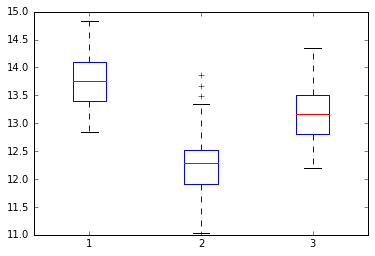

In [16]:
classes = np.unique(df['class'])
print 'classes : ', classes

#alcohol_by_class = [df['alcohol'][df['class'] == c] for c in classes]
alcohol_by_class = []
for c in classes:
    class_mask = df['class'] == c
    alcohol_by_class.append(df['alcohol'][class_mask])
_ = pl.boxplot(alcohol_by_class)

dataframes have a [boxplot](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.boxplot.html) function that does per-class plotting with the *by* parameter :

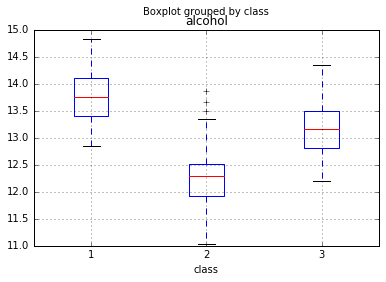

In [17]:
_ = df.boxplot(by="class", column='alcohol')

We can do that for each column

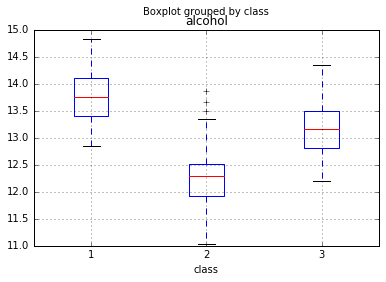

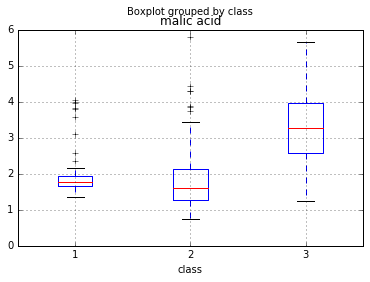

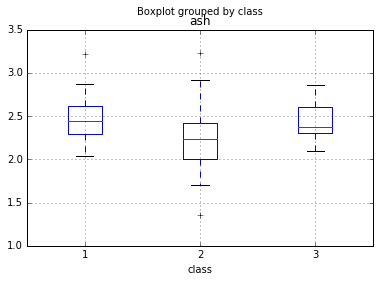

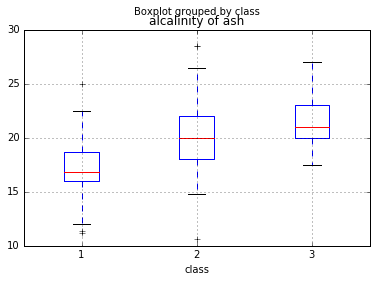

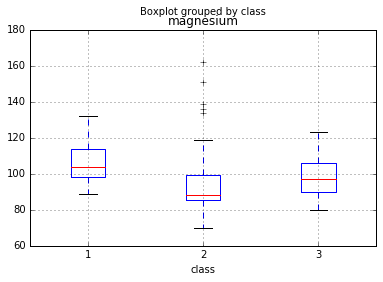

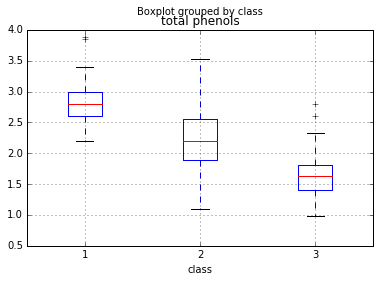

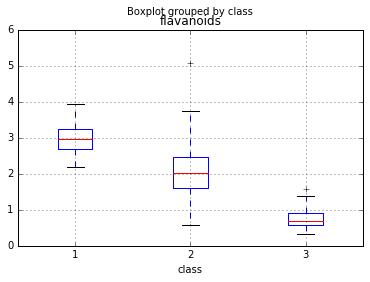

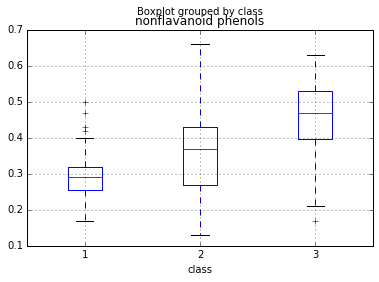

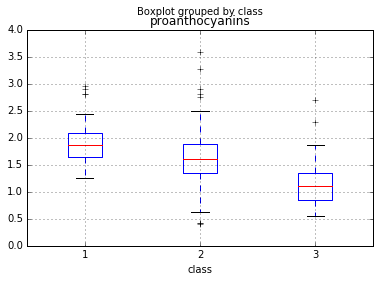

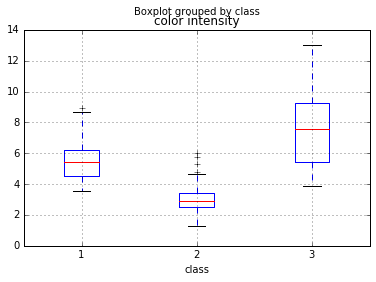

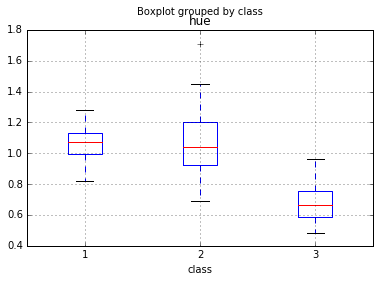

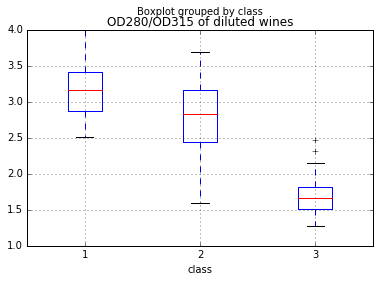

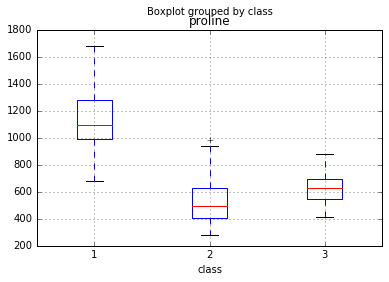

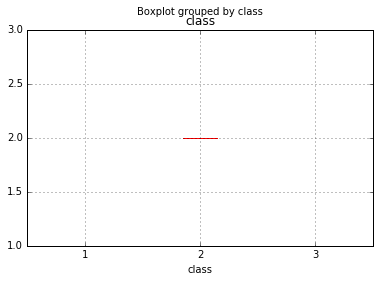

In [18]:
for c in df.columns:
    _ = df.boxplot(by='class', column=c)

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: By looking at the boxplot, which features seems the most discriminative ?</p>

### Classification with k-NN

We'll use the [k Nearest Neighbor](http://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) to classify the wine dataset.

We'll call our data matrix $X$ and our label vector $y$. As an example, we'll use only 2 features : magnesium and total phenols.

In [ ]:
# only the data
#X_2d = df.drop("class", axis=1).as_matrix()
X = df[['magnesium', 'total phenols']].as_matrix()
y = df['class'].as_matrix()
print "X shape : ", X.shape
print "y shape : ", y.shape

#### Visualization

In [ ]:
class_colors = {1:'r', 2:'g', 3:'b'}
for c in [1, 2, 3]:
    X_class = X[y == c]
    pl.scatter(X_class[:,0], X_class[:,1], color=class_colors[c], label='class ' + str(c))
pl.legend()
pl.xlabel('magnesium')
pl.ylabel('total phenols')

#### Standardization

As you can see from the df.describe() above, the range values for each column in our dataset varies a lot. Depending on the model you want to use, that can be a big problem.

The first model we'll use here is k-Nearest Neighbor with the euclidean distance. When using the euclidean distance, it is important to think about how to preprocess your data.

For example, look at the 'alcohol' and 'total phenols' columns. The stddev for magnesium is 14 while for total phenols it is 0.62. This means that the data are more spread out on the magnesium axis compare to the phenols axis. And if we use raw values to compute distances, the magnesium axis will be much more important than the phenols axis, but this importance will just be due to the (arbitrary) scales that we used to measure magnesium and phenols.

In [ ]:
print df['magnesium'].describe()
print df['total phenols'].describe()

To make the distances less dependent on particular scales, we can standardize our data by making sure each column has 0 mean and unit variance, using [sklearn.preprocessing.scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) .

#### Train/test split

To build and evaluate a machine learning model, we need to split our data into training and testing sets. Scikit learn has a [cross_validation](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) module that helps with this task.

In [ ]:
from sklearn import cross_validation
# train and test are indices arrays containing the indices of train/test samples
train, test = cross_validation.train_test_split(
    np.arange(X.shape[0]), test_size=0.4, random_state=42 # we fix random state for reproducibility)
)

print "train shape : ", train.shape
print "test shape  : ", test.shape

#### KNN classification

We will use a k-Nearest Neighbor classifier. This classifier will classify a new sample by assigning it the class of its nearest neighbor (for k=1). It computes the distance between the new sample and all the samples in the training set, find the nearest training sample and then use the class of the nearest neighbor to classify the new sample.

The [scipy.spatial.distance](http://docs.scipy.org/doc/scipy/reference/spatial.distance.html) module helps with distance computation

In [ ]:
def norm(x):
    return np.sqrt(x.dot(x))

def euclidean_distance(x1, x2):
    """Euclidean distance"""
    return norm(x1 - x2)

def distances(X_train, x):
    """
    Returns a vector containing the distance between x and each
    sample in X_train
    """
    n_train = X_train.shape[0]
    return np.array([euclidean_distance(X_train[i,:], x) for i in range(n_train)])

def nn_classify_single(X_train, y_train, X):
    """
    Nearest neighbor classifier. Returns the class of the nearest training vector
    """
    dists = distances(X_train, X)
    closest = np.argmin(dists)
    return y_train[closest]

def nn_classify(X_train, y_train, X):
    """
    Assign to each row in X the class of its nearest neighbor in X_train
    """
    y_pred = np.zeros(X.shape[0], dtype=np.int)
    for i in xrange(X.shape[0]):
        y_pred[i] = nn_classify_single(X_train, y_train, X[i])
    return y_pred

y_test_pred = nn_classify(X[train], y[train], X[test])
print "y_true : ", y[test]
print "y_pred : ", y_test_pred

We can evaluate the performance of our classifier by computing the f1 score or plotting a confusion matrix.

In [ ]:
import matplotlib.cm as cm
def plot_confusion_matrix(confmat, labels_names, ax=None):
    if ax is None:
        ax = pl.subplot(111)
    cmim = ax.matshow(confmat, interpolation='nearest', cmap=cm.jet)

    for i in xrange(confmat.shape[0]):
        for j in xrange(confmat.shape[1]):
            ax.annotate(str(confmat[i, j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center',
                        fontsize=8)
    ax.set_xticks(np.arange(confmat.shape[0]))
    ax.set_xticklabels([labels_names[l] for l in xrange(confmat.shape[0])], rotation='vertical')
    ax.set_yticks(np.arange(confmat.shape[1]))
    _ = ax.set_yticklabels([labels_names[l] for l in xrange(confmat.shape[1])])
    ax.set_xlabel('predicted label')
    ax.xaxis.set_label_position('top')
    ax.set_ylabel('true label')
    pl.colorbar(cmim, shrink=0.7, orientation='horizontal', pad=0.01)

In [ ]:
import sklearn.metrics as skmetrics

labels_names=['1', '2', '3']
C = skmetrics.confusion_matrix(y_true=y[test], y_pred=y_test_pred)
plot_confusion_matrix(C, labels_names)

print skmetrics.classification_report(y_true=y[test], y_pred=y_test_pred)

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Now, normalize (scale) the columns of your data matrix and re-run the classification. What do you observe ?</p>

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Above, we implemented a basic nearest neighbor classifier. Modify it so that it is a k nearest neighbor classifier. Evaluate it for k=3, 5, 10. Does increasing k help ? Is there a limit after which increasing k is useless ? Why ?</p>

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: In our example, we only used two features (magnesium and total phenols). Try classifying with all the features and compare the performance.</p>

### <p style="background-color:#0066FF; color:#fff;padding:5px; font-weight:bold">Cool links of the week</p>

#### Scikit-learn

You should have a look at the [scikit-learn docs](http://scikit-learn.org/stable/index.html). It is THE basic machine learning for python and the user guide is really nice. There is a [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) class that does what you just implemented (kNN classification).

#### Scikit-learn cheatsheet

There is a [cheatsheet](http://scikit-learn.org/stable/tutorial/machine_learning_map/) available on scikit-learn's website that help you choose an algorithm when you're lost. It is of course simplified and doesn't include all algorithms and criterions, but it is a good starting point.

#### Visualization

Pandas allows you to do quite nice visualizations :

http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [ ]:
from pandas.tools.plotting import scatter_matrix

_ = scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')

In the scatter plot above, we see that flavanoids and total phenols seem to be correlated. And indeed, if we compute [pearson's correlation](http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient), we see that we get 0.8

In [ ]:
corr = df.corr()
print corr['flavanoids']['total phenols']

#### Interesting ipython notebooks

[nbviewer.ipython.org](http://nbviewer.ipython.org/) has a nice collection of ipython notebooks that showcase various libraries (and even different languages) that you can use with ipython.

Among others, [julia](http://julialang.org/) is an interesting new open source scientific programming language that offers really cool performances. And you can use it as an ijulia notebook =)